# DATA ANALYSIS part 4: player and team scores

In this section,the players were assigned scores on the basis of batting and bowling performances. Thereafter the team scores were assigned based on the playing eleven players in each match

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Standardize batting performances by assigning scores

In [2]:
batter_stats=pd.read_csv("C:\\Users\\DELL\\Cricdata\\Batterstats_overall.csv")

In [3]:
batter_stats.head()

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4,77.83,80.00,1-5
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3,10,4,0,0,2,51.11,2.00,1-5
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6,160,83,0,0,4,61.42,20.75,6-10
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7,214,101,0,0,6,49.40,16.83,6-10
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4,128,92,0,0,4,63.69,23.00,1-5


In [4]:
batter_stats.columns

Index(['batting_team', 'striker', 'batter_labels', 'matches', 'balls_faced',
       'runs_off_bat', '50s', '100s', 'dismissals', 'strike_rate',
       'batting_average', 'matches_played'],
      dtype='object')

In [5]:
batter_stats['striker'].value_counts()

AE Jones       1
K Speed        1
CL Griffith    1
E Thorpe       1
FC Wilson      1
              ..
LCN Smith      1
NR Sciver      1
PC Graham      1
R Slater       1
SN Luff        1
Name: striker, Length: 158, dtype: int64

In [6]:
batter_stats[batter_stats['striker']=='RA Fackrell']

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played


In [ ]:
batter_stats['striker'][batter_stats['batter_labels']=='RA Fackrell (Central Sparks)']='RA Fackrell (CF)'
batter_stats['striker'][batter_stats['batter_labels']=='RA Fackrell (Lightning)']='RA Fackrell (L)'

In [8]:
batter_stats.iloc[[15,33]]

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
15,Central Sparks,RA Fackrell (CF),RA Fackrell (Central Sparks),7,139,75,0,0,6,56.56,12.5,6-10
33,Lightning,RA Fackrell (L),RA Fackrell (Lightning),1,23,8,0,0,1,34.78,8.0,1-5


In [9]:
#batter_stats.to_csv("C:\\Users\\DELL\\Cricdata\\Batterstats_overall.csv",index=False)

In [10]:
player_batting = batter_stats[['striker','matches','runs_off_bat', '50s', '100s','strike_rate','batting_average']]
player_batting.head()

,striker,matches,runs_off_bat,50s,100s,strike_rate,batting_average
0,AE Jones,5,320,0,2,77.83,80.00
1,Anisha Patel,3,4,0,0,51.11,2.00
2,CAE Hill,6,83,0,0,61.42,20.75
3,CK Boycott,7,101,0,0,49.40,16.83
4,D Perrin,4,92,0,0,63.69,23.00


In [11]:
player_batting['striker'].value_counts()

AE Jones       1
K Speed        1
CL Griffith    1
E Thorpe       1
FC Wilson      1
              ..
LCN Smith      1
NR Sciver      1
PC Graham      1
R Slater       1
SN Luff        1
Name: striker, Length: 158, dtype: int64

In [ ]:
player_batting.rename(columns={"striker":"player","matches":"innings_batted","runs_off_bat":"runs"},inplace=True)

In [13]:
player_batting.head()

,player,innings_batted,runs,50s,100s,strike_rate,batting_average
0,AE Jones,5,320,0,2,77.83,80.00
1,Anisha Patel,3,4,0,0,51.11,2.00
2,CAE Hill,6,83,0,0,61.42,20.75
3,CK Boycott,7,101,0,0,49.40,16.83
4,D Perrin,4,92,0,0,63.69,23.00


All the batting parameters were scaled by Z-score normalization for consistency. This was done because different parameters have different ranges and significance of values. Z –score normalization is method of standardising values such that the mean becomes 0 and standard deviation 1

In [14]:
#define scaling function based on Z-score method such that the mean becomes 0 and standard deviation 1
def scale_columns(df,col,col_new):
    df[col_new]=(df[col]-df[col].mean())/df[col].std()  

In [ ]:
#scale the column values for normalization
scale_columns(player_batting,'innings_batted','innings_batted_scaled')
scale_columns(player_batting,'runs','runs_scaled')
scale_columns(player_batting,'50s','50s_scaled')
scale_columns(player_batting,'100s','100s_scaled')
scale_columns(player_batting,'strike_rate','strike_rate_scaled')
scale_columns(player_batting,'batting_average','batting_average_scaled')

In [16]:
player_batting.head()

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled
0,AE Jones,5,320,0,2,77.83,80.00,-0.356631,1.295095,-0.541493,5.395079,1.058726,3.700996
1,Anisha Patel,3,4,0,0,51.11,2.00,-0.848750,-0.870539,-0.541493,-0.268858,-0.123618,-1.155638
2,CAE Hill,6,83,0,0,61.42,20.75,-0.110571,-0.329131,-0.541493,-0.268858,0.332593,0.011822
3,CK Boycott,7,101,0,0,49.40,16.83,0.135489,-0.205772,-0.541493,-0.268858,-0.199285,-0.232255
4,D Perrin,4,92,0,0,63.69,23.00,-0.602691,-0.267451,-0.541493,-0.268858,0.433039,0.151917


For batting score, the parameters along with their weightages were– 
 - No. of Innings Batted: 5%, 
 - Runs: 45%, 
 - No. of Half-Centuries: 5%, 
 - No. of Centuries: 5%, 
 - Batting Strike Rate: 20%, 
 - Batting Average: 20%

In [17]:
player_batting['batter_score'] = (0.05*player_batting['innings_batted_scaled'] + 
                                  0.45*player_batting['runs_scaled'] + 
                                  0.05*player_batting['50s_scaled'] + 
                                  0.05*player_batting['100s_scaled'] + 
                                  0.20*player_batting['strike_rate_scaled'] + 
                                  0.20*player_batting['batting_average_scaled'])

In [18]:
player_batting.head()

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled,batter_score
0,AE Jones,5,320,0,2,77.83,80.00,-0.356631,1.295095,-0.541493,5.395079,1.058726,3.700996,1.759585
1,Anisha Patel,3,4,0,0,51.11,2.00,-0.848750,-0.870539,-0.541493,-0.268858,-0.123618,-1.155638,-0.730549
2,CAE Hill,6,83,0,0,61.42,20.75,-0.110571,-0.329131,-0.541493,-0.268858,0.332593,0.011822,-0.125272
3,CK Boycott,7,101,0,0,49.40,16.83,0.135489,-0.205772,-0.541493,-0.268858,-0.199285,-0.232255,-0.212648
4,D Perrin,4,92,0,0,63.69,23.00,-0.602691,-0.267451,-0.541493,-0.268858,0.433039,0.151917,-0.074014


In [19]:
player_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  158 non-null    object 
 1   innings_batted          158 non-null    int64  
 2   runs                    158 non-null    int64  
 3   50s                     158 non-null    int64  
 4   100s                    158 non-null    int64  
 5   strike_rate             158 non-null    float64
 6   batting_average         156 non-null    float64
 7   innings_batted_scaled   158 non-null    float64
 8   runs_scaled             158 non-null    float64
 9   50s_scaled              158 non-null    float64
 10  100s_scaled             158 non-null    float64
 11  strike_rate_scaled      158 non-null    float64
 12  batting_average_scaled  156 non-null    float64
 13  batter_score            156 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory 

In [20]:
player_batting[player_batting['batter_score'].isnull()]

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled,batter_score
25,Ilenia Sims,1,1,0,0,14.29,NaN,-1.34087,-0.891099,-0.541493,-0.268858,-1.752881,NaN,NaN
26,J Groves,1,2,0,0,66.67,NaN,-1.34087,-0.884246,-0.541493,-0.268858,0.564902,NaN,NaN


In [21]:
player_batting['batter_score'].min()

-1.24471401065491

In [22]:
# for players with null batting score,the minimum value was assigned
player_batting['batter_score']=player_batting['batter_score'].fillna(player_batting['batter_score'].min())

In [23]:
player_batting.iloc[[25,26]]

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled,batter_score
25,Ilenia Sims,1,1,0,0,14.29,NaN,-1.34087,-0.891099,-0.541493,-0.268858,-1.752881,NaN,-1.244714
26,J Groves,1,2,0,0,66.67,NaN,-1.34087,-0.884246,-0.541493,-0.268858,0.564902,NaN,-1.244714


In [24]:
player_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  158 non-null    object 
 1   innings_batted          158 non-null    int64  
 2   runs                    158 non-null    int64  
 3   50s                     158 non-null    int64  
 4   100s                    158 non-null    int64  
 5   strike_rate             158 non-null    float64
 6   batting_average         156 non-null    float64
 7   innings_batted_scaled   158 non-null    float64
 8   runs_scaled             158 non-null    float64
 9   50s_scaled              158 non-null    float64
 10  100s_scaled             158 non-null    float64
 11  strike_rate_scaled      158 non-null    float64
 12  batting_average_scaled  156 non-null    float64
 13  batter_score            158 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory 

Finally, the batting scores were scaled using the min-max normalization method to bring the scores within the 0 to 1 range. The minimum score got assigned 0 and the maximum score became 1 and the scores in between got decimal values between 0 and 1 accordingly. 

In [25]:
#define function for min-max normalization
def scale_columns_0to1(df,col,col_new):
    df[col_new]=(df[col] - df[col].min())/(df[col].max() - df[col].min())

In [26]:
#the batting scores were finally normalized by min-max scaling to bring all values in the range from 0 to 1
scale_columns_0to1(player_batting,'batter_score','batter_score_scaled')

In [27]:
player_batting.head()

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled,batter_score,batter_score_scaled
0,AE Jones,5,320,0,2,77.83,80.00,-0.356631,1.295095,-0.541493,5.395079,1.058726,3.700996,1.759585,0.676597
1,Anisha Patel,3,4,0,0,51.11,2.00,-0.848750,-0.870539,-0.541493,-0.268858,-0.123618,-1.155638,-0.730549,0.115795
2,CAE Hill,6,83,0,0,61.42,20.75,-0.110571,-0.329131,-0.541493,-0.268858,0.332593,0.011822,-0.125272,0.252109
3,CK Boycott,7,101,0,0,49.40,16.83,0.135489,-0.205772,-0.541493,-0.268858,-0.199285,-0.232255,-0.212648,0.232431
4,D Perrin,4,92,0,0,63.69,23.00,-0.602691,-0.267451,-0.541493,-0.268858,0.433039,0.151917,-0.074014,0.263653


In [28]:
#save the dataframe to csv file
#player_batting.to_csv("C:\\Users\\DELL\\Cricdata\\player_batting.csv",index=False)

## Standardize bowling performances by assigning scores

In [29]:
bowler_stats_overall=pd.read_csv("C:\\Users\\DELL\\Cricdata\\Bowlerstats_overall.csv")

In [30]:
bowler_stats_overall.head()

,bowler,bowling_team,overcounts,overs_bowled,wicketcounts,wickets_taken,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,South East Stars,69.0,31 - 70,7.0,<= 10,4.62,21.10,31.80
1,A Griffiths,Western Storm,39.0,31 - 70,3.0,<= 10,5.32,21.25,28.50
2,A Hartley,Thunder,123.0,>= 71,21.0,>= 21,3.85,18.90,28.80
3,A Shrubsole,Western Storm,38.0,31 - 70,4.0,<= 10,3.76,22.34,40.00
4,AD Presland,Lightning,27.0,11 - 30,5.0,<= 10,4.73,24.89,30.67


In [31]:
bowler_stats_overall['bowler'].value_counts()

A Capsey       1
A Griffiths    1
Marie Kelly    1
MS Belt        1
MK Villiers    1
              ..
EL Lamb        1
EL Arlott      1
EF Telford     1
EA Russell     1
Y Graves       1
Name: bowler, Length: 112, dtype: int64

In [32]:
bowler_stats_overall[bowler_stats_overall['bowler']=='RA Fackrell']

,bowler,bowling_team,overcounts,overs_bowled,wicketcounts,wickets_taken,econ_rate,bowling_average,bowler_strikerate


In [ ]:
bowler_stats_overall['bowler'][bowler_stats_overall['bowler']=='RA Fackrell']='RA Fackrell (CF)'

In [34]:
bowler_stats_overall.iloc[98]

bowler               RA Fackrell (CF)
bowling_team           Central Sparks
overcounts                       47.0
overs_bowled                  31 - 70
wicketcounts                     11.0
wickets_taken                 11 - 20
econ_rate                        5.53
bowling_average                 10.04
bowler_strikerate               14.88
Name: 98, dtype: object

In [35]:
#bowler_stats_overall.to_csv("C:\\Users\\DELL\\Cricdata\\Bowlerstats_overall.csv",index=False)

In [36]:
bowler_stats_overall.columns

Index(['bowler', 'bowling_team', 'overcounts', 'overs_bowled', 'wicketcounts',
       'wickets_taken', 'econ_rate', 'bowling_average', 'bowler_strikerate'],
      dtype='object')

In [37]:
player_bowling = bowler_stats_overall[['bowler','overcounts','wicketcounts','econ_rate','bowling_average','bowler_strikerate']]
player_bowling.head()

,bowler,overcounts,wicketcounts,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,69.0,7.0,4.62,21.10,31.80
1,A Griffiths,39.0,3.0,5.32,21.25,28.50
2,A Hartley,123.0,21.0,3.85,18.90,28.80
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00
4,AD Presland,27.0,5.0,4.73,24.89,30.67


In [ ]:
player_bowling.rename(columns={"bowler":"player","overcounts":"overs_bowled","wicketcounts":"wickets_taken"},inplace=True)

In [39]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,69.0,7.0,4.62,21.10,31.80
1,A Griffiths,39.0,3.0,5.32,21.25,28.50
2,A Hartley,123.0,21.0,3.85,18.90,28.80
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00
4,AD Presland,27.0,5.0,4.73,24.89,30.67


The values of bowling parameters such as economy rate, bowling strike rate and bowling average were inversed because unlike wickets or batting parameters, lesser values of these bowling parameters signify better performance.

In [ ]:
#inverse the specific bowling columns
player_bowling['inv_econ_rate'] = 1/player_bowling['econ_rate']
player_bowling['inv_bowling_average'] = 1/player_bowling['bowling_average']
player_bowling['inv_bowler_strikerate'] = 1/player_bowling['bowler_strikerate']

All the bowling parameters were scaled by Z-score normalization for consistency. This was done because different parameters have different ranges and significance of values. Z –score normalization is method of standardising values such that the mean becomes 0 and standard deviation 1

In [42]:
#scale the column values by Z-score normalization
scale_columns(player_bowling,'overs_bowled','overs_bowled_scaled')
scale_columns(player_bowling,'wickets_taken','wickets_taken_scaled')
scale_columns(player_bowling,'inv_econ_rate','econ_rate_scaled')
scale_columns(player_bowling,'inv_bowling_average','bowling_average_scaled')
scale_columns(player_bowling,'inv_bowler_strikerate','bowler_strikerate_scaled')

In [43]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled
0,A Capsey,69.0,7.0,4.62,21.10,31.80,0.216450,0.047393,0.031447,0.736554,-0.132306,0.193497,-0.046230,-0.298897
1,A Griffiths,39.0,3.0,5.32,21.25,28.50,0.187970,0.047059,0.035088,-0.165678,-0.726938,-0.433775,-0.063124,-0.008172
2,A Hartley,123.0,21.0,3.85,18.90,28.80,0.259740,0.052910,0.034722,2.360571,1.948909,1.146951,0.232344,-0.037355
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00,0.265957,0.044763,0.025000,-0.195752,-0.578280,1.283884,-0.179067,-0.813613
4,AD Presland,27.0,5.0,4.73,24.89,30.67,0.211416,0.040177,0.032605,-0.526570,-0.429622,0.082630,-0.410644,-0.206389


For bowling score, the parameters along with their weightages were– 
- No. of Overs Bowled: 5%, 
- Wickets: 40%, 
- Economy Rate: 25%, 
- Bowling Strike Rate: 15%, 
- Bowling Average: 15% 

In [44]:
player_bowling['bowler_score'] = (0.05*player_bowling['overs_bowled_scaled'] + 
                                  0.40*player_bowling['wickets_taken_scaled'] + 
                                  0.25*player_bowling['econ_rate_scaled'] + 
                                  0.15*player_bowling['bowling_average_scaled'] + 
                                  0.15*player_bowling['bowler_strikerate_scaled'])

In [45]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled,bowler_score
0,A Capsey,69.0,7.0,4.62,21.10,31.80,0.216450,0.047393,0.031447,0.736554,-0.132306,0.193497,-0.046230,-0.298897,-0.019489
1,A Griffiths,39.0,3.0,5.32,21.25,28.50,0.187970,0.047059,0.035088,-0.165678,-0.726938,-0.433775,-0.063124,-0.008172,-0.418197
2,A Hartley,123.0,21.0,3.85,18.90,28.80,0.259740,0.052910,0.034722,2.360571,1.948909,1.146951,0.232344,-0.037355,1.213578
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00,0.265957,0.044763,0.025000,-0.195752,-0.578280,1.283884,-0.179067,-0.813613,-0.069031
4,AD Presland,27.0,5.0,4.73,24.89,30.67,0.211416,0.040177,0.032605,-0.526570,-0.429622,0.082630,-0.410644,-0.206389,-0.270075


In [46]:
player_bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    112 non-null    object 
 1   overs_bowled              112 non-null    float64
 2   wickets_taken             100 non-null    float64
 3   econ_rate                 112 non-null    float64
 4   bowling_average           100 non-null    float64
 5   bowler_strikerate         100 non-null    float64
 6   inv_econ_rate             112 non-null    float64
 7   inv_bowling_average       100 non-null    float64
 8   inv_bowler_strikerate     100 non-null    float64
 9   overs_bowled_scaled       112 non-null    float64
 10  wickets_taken_scaled      100 non-null    float64
 11  econ_rate_scaled          112 non-null    float64
 12  bowling_average_scaled    100 non-null    float64
 13  bowler_strikerate_scaled  100 non-null    float64
 14  bowler_sco

In [47]:
player_bowling[player_bowling['bowler_score'].isnull()]

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled,bowler_score
17,C Skelton,6.0,NaN,5.84,NaN,NaN,0.171233,NaN,NaN,-1.158132,NaN,-0.802405,NaN,NaN,NaN
22,D Perrin,1.0,NaN,10.00,NaN,NaN,0.100000,NaN,NaN,-1.308504,NaN,-2.371294,NaN,NaN,NaN
28,E Thorpe,16.0,NaN,7.11,NaN,NaN,0.140647,NaN,NaN,-0.857388,NaN,-1.476053,NaN,NaN,NaN
29,E Windsor,5.0,NaN,3.00,NaN,NaN,0.333333,NaN,NaN,-1.188207,NaN,2.767823,NaN,NaN,NaN
31,EF Telford,14.0,NaN,7.47,NaN,NaN,0.133869,NaN,NaN,-0.917537,NaN,-1.625341,NaN,NaN,NaN
41,GEB Boyce,1.0,NaN,10.00,NaN,NaN,0.100000,NaN,NaN,-1.308504,NaN,-2.371294,NaN,NaN,NaN
51,HL Fenby,11.0,NaN,6.30,NaN,NaN,0.158730,NaN,NaN,-1.007760,NaN,-1.077775,NaN,NaN,NaN
55,J Groves,8.0,NaN,7.38,NaN,NaN,0.135501,NaN,NaN,-1.097984,NaN,-1.589385,NaN,NaN,NaN
56,J Roberts,3.0,NaN,5.00,NaN,NaN,0.200000,NaN,NaN,-1.248355,NaN,-0.168815,NaN,NaN,NaN
72,L Tipton,2.0,NaN,6.00,NaN,NaN,0.166667,NaN,NaN,-1.278430,NaN,-0.902975,NaN,NaN,NaN


In [48]:
#for players with no bolwing score, the minimum value was assigned
player_bowling['bowler_score']=player_bowling['bowler_score'].fillna(player_bowling['bowler_score'].min())

In [49]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled,bowler_score
0,A Capsey,69.0,7.0,4.62,21.10,31.80,0.216450,0.047393,0.031447,0.736554,-0.132306,0.193497,-0.046230,-0.298897,-0.019489
1,A Griffiths,39.0,3.0,5.32,21.25,28.50,0.187970,0.047059,0.035088,-0.165678,-0.726938,-0.433775,-0.063124,-0.008172,-0.418197
2,A Hartley,123.0,21.0,3.85,18.90,28.80,0.259740,0.052910,0.034722,2.360571,1.948909,1.146951,0.232344,-0.037355,1.213578
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00,0.265957,0.044763,0.025000,-0.195752,-0.578280,1.283884,-0.179067,-0.813613,-0.069031
4,AD Presland,27.0,5.0,4.73,24.89,30.67,0.211416,0.040177,0.032605,-0.526570,-0.429622,0.082630,-0.410644,-0.206389,-0.270075


Finally, the bowling scores were scaled using the min-max normalization method to bring the scores within the 0 to 1 range. The minimum score got assigned 0 and the maximum score became 1 and the scores in between got decimal values between 0 and 1 accordingly.

In [50]:
#the bowling scores were finally normalized by min-max scaling to bring all values in the range from 0 to 1
scale_columns_0to1(player_bowling,'bowler_score','bowler_score_scaled')

In [51]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled,bowler_score,bowler_score_scaled
0,A Capsey,69.0,7.0,4.62,21.10,31.80,0.216450,0.047393,0.031447,0.736554,-0.132306,0.193497,-0.046230,-0.298897,-0.019489,0.337266
1,A Griffiths,39.0,3.0,5.32,21.25,28.50,0.187970,0.047059,0.035088,-0.165678,-0.726938,-0.433775,-0.063124,-0.008172,-0.418197,0.181313
2,A Hartley,123.0,21.0,3.85,18.90,28.80,0.259740,0.052910,0.034722,2.360571,1.948909,1.146951,0.232344,-0.037355,1.213578,0.819574
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00,0.265957,0.044763,0.025000,-0.195752,-0.578280,1.283884,-0.179067,-0.813613,-0.069031,0.317888
4,AD Presland,27.0,5.0,4.73,24.89,30.67,0.211416,0.040177,0.032605,-0.526570,-0.429622,0.082630,-0.410644,-0.206389,-0.270075,0.239251


In [52]:
#save the dataframe to csv file
#player_bowling.to_csv("C:\\Users\\DELL\\Cricdata\\player_bowling.csv",index=False)

## Putting the batter and bowler scores of all players together

In [53]:
player_batting.head()

,player,innings_batted,runs,50s,100s,strike_rate,batting_average,innings_batted_scaled,runs_scaled,50s_scaled,100s_scaled,strike_rate_scaled,batting_average_scaled,batter_score,batter_score_scaled
0,AE Jones,5,320,0,2,77.83,80.00,-0.356631,1.295095,-0.541493,5.395079,1.058726,3.700996,1.759585,0.676597
1,Anisha Patel,3,4,0,0,51.11,2.00,-0.848750,-0.870539,-0.541493,-0.268858,-0.123618,-1.155638,-0.730549,0.115795
2,CAE Hill,6,83,0,0,61.42,20.75,-0.110571,-0.329131,-0.541493,-0.268858,0.332593,0.011822,-0.125272,0.252109
3,CK Boycott,7,101,0,0,49.40,16.83,0.135489,-0.205772,-0.541493,-0.268858,-0.199285,-0.232255,-0.212648,0.232431
4,D Perrin,4,92,0,0,63.69,23.00,-0.602691,-0.267451,-0.541493,-0.268858,0.433039,0.151917,-0.074014,0.263653


In [54]:
player_bowling.head()

,player,overs_bowled,wickets_taken,econ_rate,bowling_average,bowler_strikerate,inv_econ_rate,inv_bowling_average,inv_bowler_strikerate,overs_bowled_scaled,wickets_taken_scaled,econ_rate_scaled,bowling_average_scaled,bowler_strikerate_scaled,bowler_score,bowler_score_scaled
0,A Capsey,69.0,7.0,4.62,21.10,31.80,0.216450,0.047393,0.031447,0.736554,-0.132306,0.193497,-0.046230,-0.298897,-0.019489,0.337266
1,A Griffiths,39.0,3.0,5.32,21.25,28.50,0.187970,0.047059,0.035088,-0.165678,-0.726938,-0.433775,-0.063124,-0.008172,-0.418197,0.181313
2,A Hartley,123.0,21.0,3.85,18.90,28.80,0.259740,0.052910,0.034722,2.360571,1.948909,1.146951,0.232344,-0.037355,1.213578,0.819574
3,A Shrubsole,38.0,4.0,3.76,22.34,40.00,0.265957,0.044763,0.025000,-0.195752,-0.578280,1.283884,-0.179067,-0.813613,-0.069031,0.317888
4,AD Presland,27.0,5.0,4.73,24.89,30.67,0.211416,0.040177,0.032605,-0.526570,-0.429622,0.082630,-0.410644,-0.206389,-0.270075,0.239251


In [55]:
player_scores = pd.merge(player_batting[['player','batter_score_scaled']], 
                         player_bowling[['player','bowler_score_scaled']],
                         on='player', how='outer')

In [56]:
player_scores.head(10)

,player,batter_score_scaled,bowler_score_scaled
0,AE Jones,0.676597,NaN
1,Anisha Patel,0.115795,0.292210
2,CAE Hill,0.252109,NaN
3,CK Boycott,0.232431,0.432563
4,D Perrin,0.263653,0.000000
5,E Jones,0.832781,0.586093
6,EA Russell,0.167500,0.342921
7,EL Arlott,0.297847,0.447417
8,GK Davis,0.195423,0.491267
9,GM Davies,0.471245,NaN


In [57]:
player_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               159 non-null    object 
 1   batter_score_scaled  158 non-null    float64
 2   bowler_score_scaled  113 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.0+ KB


In [58]:
player_scores['player'].value_counts()

AE Jones       1
KJ Wolfe       1
E Thorpe       1
FC Wilson      1
G Scrivens     1
              ..
NR Sciver      1
PC Graham      1
R Slater       1
RHM Hopkins    1
EF Telford     1
Name: player, Length: 159, dtype: int64

In [59]:
#save the dataframe to csv file
#player_scores.to_csv("C:\\Users\\DELL\\Cricdata\\player_scores.csv",index=False)

In [72]:
match_player_roster=pd.read_csv("C:\\Users\\DELL\\Cricdata\\match_player_roster.csv")

In [73]:
match_player_roster.head()

,match_id,team,player,role
0,1229326,Sunrisers,KL Midwood,allrounder
1,1229326,Sunrisers,AD Carr,batter
2,1229326,Sunrisers,FC Wilson,batter
3,1229326,Sunrisers,ND Dattani,allrounder
4,1229326,Sunrisers,MK Villiers,bowler


In [74]:
match_player_roster[match_player_roster['player']=='RA Fackrell']

,match_id,team,player,role


In [ ]:
match_player_roster['player'][(match_player_roster['team']=='Central Sparks') & 
                              (match_player_roster['player']=='RA Fackrell')]  ='RA Fackrell (CF)'

match_player_roster['player'][(match_player_roster['team']=='Lightning') & 
                              (match_player_roster['player']=='RA Fackrell')] ='RA Fackrell (L)'

In [76]:
match_player_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  1210 non-null   int64 
 1   team      1210 non-null   object
 2   player    1210 non-null   object
 3   role      1210 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.9+ KB


In [77]:
match_player_roster = pd.merge(match_player_roster, player_scores, on='player', how='left')

In [78]:
match_player_roster.head(10)

,match_id,team,player,role,batter_score_scaled,bowler_score_scaled
0,1229326,Sunrisers,KL Midwood,allrounder,0.205363,0.135658
1,1229326,Sunrisers,AD Carr,batter,0.263680,NaN
2,1229326,Sunrisers,FC Wilson,batter,0.411920,NaN
3,1229326,Sunrisers,ND Dattani,allrounder,0.385550,0.022855
4,1229326,Sunrisers,MK Villiers,bowler,0.320756,0.207903
5,1229326,Sunrisers,G Scrivens,allrounder,0.410963,0.161009
6,1229326,Sunrisers,AJ Macleod,allrounder,0.397936,0.210594
7,1229326,Sunrisers,J Gardner,allrounder,0.411357,0.177006
8,1229326,Sunrisers,Sonali Patel,bowler,0.121754,0.466403
9,1229326,Sunrisers,KS Castle,allrounder,0.328309,0.393946


In [79]:
match_player_roster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             1210 non-null   int64  
 1   team                 1210 non-null   object 
 2   player               1210 non-null   object 
 3   role                 1210 non-null   object 
 4   batter_score_scaled  1207 non-null   float64
 5   bowler_score_scaled  889 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 66.2+ KB


In [ ]:
#match_player_roster.to_csv("C:\\Users\\DELL\\Cricdata\\match_player_roster.csv",index=False)

In [21]:
match_player_roster.head()

,match_id,team,player,role,batter_score_scaled,bowler_score_scaled
0,1229326,Sunrisers,KL Midwood,allrounder,0.205363,0.135658
1,1229326,Sunrisers,AD Carr,batter,0.263680,NaN
2,1229326,Sunrisers,FC Wilson,batter,0.411920,NaN
3,1229326,Sunrisers,ND Dattani,allrounder,0.385550,0.022855
4,1229326,Sunrisers,MK Villiers,bowler,0.320756,0.207903


In [22]:
mpr_df = match_player_roster.drop('match_id',axis=1)
mpr_df=mpr_df.drop_duplicates(keep='first').reset_index(drop=True)
mpr_df.head()

,team,player,role,batter_score_scaled,bowler_score_scaled
0,Sunrisers,KL Midwood,allrounder,0.205363,0.135658
1,Sunrisers,AD Carr,batter,0.263680,NaN
2,Sunrisers,FC Wilson,batter,0.411920,NaN
3,Sunrisers,ND Dattani,allrounder,0.385550,0.022855
4,Sunrisers,MK Villiers,bowler,0.320756,0.207903


In [46]:
order1 = mpr_df.groupby(['team']).agg({'batter_score_scaled':'median'}).sort_values('batter_score_scaled',ascending=False).index

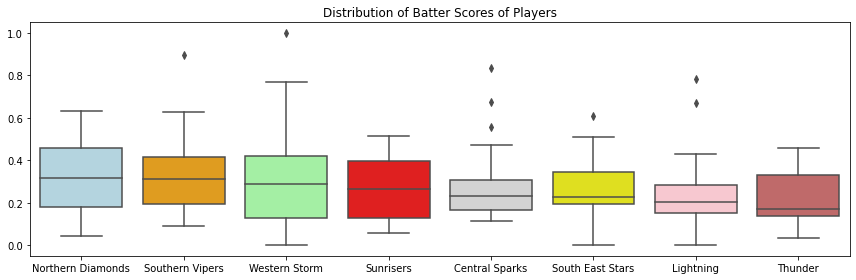

In [47]:
plt.figure(figsize=(12,4))
plt.title('Distribution of Batter Scores of Players')

sns.boxplot(x='team',y='batter_score_scaled',data=mpr_df[['team','batter_score_scaled']],
            palette={"Central Sparks":"lightgrey","Lightning":"pink","Northern Diamonds":"lightblue",
                     "South East Stars":"yellow","Southern Vipers":"orange","Sunrisers":"red",
                     "Thunder":"indianred","Western Storm":"palegreen"},order=order1)
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/DistBatterScores.jpeg',bbox_inches='tight')
plt.show()

Most batting scores of players ranged between 0.1 and 0.6 for all the teams. Few teams had players with batting scores above 0.6. Northern Diamonds, Southern Vipers and Western Storm had most players with higher batting scores that have been depicted in the upper whiskers of their boxplots.The best performing batters of Southern Vipers, Western Storm, Central Sparks, South East Stars and Lightning had distinct top batting scores and they were depicted as outliers in their respective teams’ box plots.

In [49]:
order2 = mpr_df.groupby(['team']).agg({'bowler_score_scaled':'median'}).sort_values('bowler_score_scaled',ascending=False).index

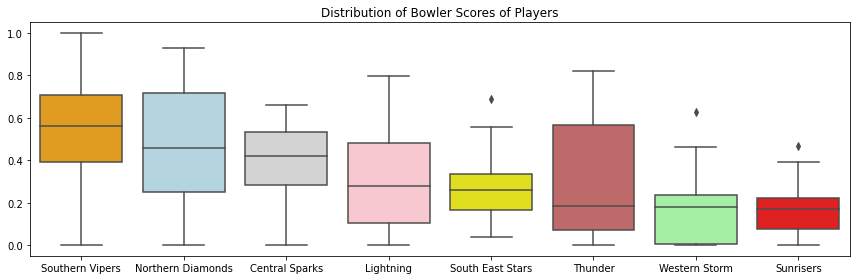

In [50]:
plt.figure(figsize=(12,4))
plt.title('Distribution of Bowler Scores of Players')
sns.boxplot(y=mpr_df['bowler_score_scaled'],x=mpr_df['team'],
            palette={"Central Sparks":"lightgrey","Lightning":"pink","Northern Diamonds":"lightblue",
                     "South East Stars":"yellow","Southern Vipers":"orange","Sunrisers":"red",
                     "Thunder":"indianred","Western Storm":"palegreen"},order=order2)
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/DistBowlerScores.jpeg',bbox_inches='tight')
plt.show()

The player bowling scores of the teams showed more variability. The scores mostly ranged from 0 to 0.8. The Southern Vipers had the highest median player bowling score close to 0.6 while the Sunrisers had the lowest median of around 0.2. 

## Computing the overall batting and bowling scores of each team in a match based on the scores of the playing 11

In [61]:
match_player_roster.columns

Index(['match_id', 'team', 'player', 'role', 'batter_score_scaled',
       'bowler_score_scaled'],
      dtype='object')

The Team Batting Score of any team in a particular match was taken by averaging all the player batting scores of the batters and allrounders in that team’s playing eleven. 

In [62]:
team_batting_score = match_player_roster[['match_id', 'team', 'player',
                                          'role', 'batter_score_scaled']][(match_player_roster['role']=='batter')|
                                                                   (match_player_roster['role']=='allrounder')]

In [63]:
team_batting_score.head()

,match_id,team,player,role,batter_score_scaled
0,1229326,Sunrisers,KL Midwood,allrounder,0.205363
1,1229326,Sunrisers,AD Carr,batter,0.263680
2,1229326,Sunrisers,FC Wilson,batter,0.411920
3,1229326,Sunrisers,ND Dattani,allrounder,0.385550
5,1229326,Sunrisers,G Scrivens,allrounder,0.410963


In [64]:
team_batting_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 1205
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             861 non-null    int64  
 1   team                 861 non-null    object 
 2   player               861 non-null    object 
 3   role                 861 non-null    object 
 4   batter_score_scaled  861 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.4+ KB


In [65]:
team_batting_score = team_batting_score.groupby(['match_id','team']).agg({'batter_score_scaled':'mean'}).reset_index()

In [66]:
team_batting_score.head(10) 

,match_id,team,batter_score_scaled
0,1229326,Southern Vipers,0.432089
1,1229326,Sunrisers,0.351885
2,1229327,Central Sparks,0.507622
3,1229327,Northern Diamonds,0.438789
4,1229328,Lightning,0.488599
5,1229328,Thunder,0.375013
6,1229329,South East Stars,0.358424
7,1229329,Western Storm,0.434135
8,1229330,Southern Vipers,0.432089
9,1229330,Western Storm,0.424910


In [67]:
team_batting_score.head(10)

,match_id,team,batter_score_scaled
0,1229326,Southern Vipers,0.432089
1,1229326,Sunrisers,0.351885
2,1229327,Central Sparks,0.507622
3,1229327,Northern Diamonds,0.438789
4,1229328,Lightning,0.488599
5,1229328,Thunder,0.375013
6,1229329,South East Stars,0.358424
7,1229329,Western Storm,0.434135
8,1229330,Southern Vipers,0.432089
9,1229330,Western Storm,0.424910


In [68]:
team_batting_score.tail(10)

,match_id,team,batter_score_scaled
100,1252289,South East Stars,0.273938
101,1252289,Thunder,0.249614
102,1252290,Sunrisers,0.360493
103,1252290,Western Storm,0.461004
104,1252291,Northern Diamonds,0.407715
105,1252291,Southern Vipers,0.413968
106,1252292,Central Sparks,0.387675
107,1252292,Northern Diamonds,0.407715
108,1252293,Northern Diamonds,0.448939
109,1252293,Southern Vipers,0.413968


The Team Bowling Score of any team was obtained by taking mean of the bowling scores of bowlers and allrounders among those eleven players of that match. 

In [69]:
team_bowling_score = match_player_roster[['match_id', 'team', 'player',
                                          'role', 'bowler_score_scaled']][(match_player_roster['role']=='bowler')|
                                                                   (match_player_roster['role']=='allrounder')]

In [70]:
team_bowling_score.head()

,match_id,team,player,role,bowler_score_scaled
0,1229326,Sunrisers,KL Midwood,allrounder,0.135658
3,1229326,Sunrisers,ND Dattani,allrounder,0.022855
4,1229326,Sunrisers,MK Villiers,bowler,0.207903
5,1229326,Sunrisers,G Scrivens,allrounder,0.161009
6,1229326,Sunrisers,AJ Macleod,allrounder,0.210594


In [71]:
team_bowling_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 1209
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             802 non-null    int64  
 1   team                 802 non-null    object 
 2   player               802 non-null    object 
 3   role                 802 non-null    object 
 4   bowler_score_scaled  772 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 37.6+ KB


In [72]:
team_bowling_score[team_bowling_score['bowler_score_scaled'].isnull()]

,match_id,team,player,role,bowler_score_scaled
95,1229332,Thunder,S Turner,bowler,NaN
102,1229332,Central Sparks,GM Davies,allrounder,NaN
126,1229333,Lightning,RA Fackrell (L),allrounder,NaN
144,1229334,Central Sparks,GM Davies,allrounder,NaN
298,1229341,Central Sparks,GM Davies,allrounder,NaN
373,1229344,Lightning,Ilenia Sims,bowler,NaN
386,1229345,Central Sparks,GM Davies,allrounder,NaN
452,1229348,Central Sparks,GM Davies,allrounder,NaN
518,1252264,Central Sparks,GM Davies,allrounder,NaN
571,1252266,Sunrisers,K Speed,allrounder,NaN


In [73]:
#remove those players with no bowling scores
team_bowling_score = team_bowling_score.dropna(axis=0, subset=['bowler_score_scaled'])
team_bowling_score.reset_index(drop=True,inplace=True)

In [74]:
team_bowling_score[team_bowling_score['bowler_score_scaled'].isnull()]

,match_id,team,player,role,bowler_score_scaled


In [75]:
team_bowling_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             772 non-null    int64  
 1   team                 772 non-null    object 
 2   player               772 non-null    object 
 3   role                 772 non-null    object 
 4   bowler_score_scaled  772 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.3+ KB


In [76]:
team_bowling_score.head()

,match_id,team,player,role,bowler_score_scaled
0,1229326,Sunrisers,KL Midwood,allrounder,0.135658
1,1229326,Sunrisers,ND Dattani,allrounder,0.022855
2,1229326,Sunrisers,MK Villiers,bowler,0.207903
3,1229326,Sunrisers,G Scrivens,allrounder,0.161009
4,1229326,Sunrisers,AJ Macleod,allrounder,0.210594


In [77]:
team_bowling_score = team_bowling_score.groupby(['match_id','team']).agg({'bowler_score_scaled':'mean'}).reset_index()

In [78]:
team_bowling_score.head()

,match_id,team,bowler_score_scaled
0,1229326,Southern Vipers,0.575077
1,1229326,Sunrisers,0.226362
2,1229327,Central Sparks,0.384719
3,1229327,Northern Diamonds,0.652276
4,1229328,Lightning,0.433753


In [79]:
team_bowling_score.tail()

,match_id,team,bowler_score_scaled
105,1252291,Southern Vipers,0.599095
106,1252292,Central Sparks,0.467749
107,1252292,Northern Diamonds,0.586641
108,1252293,Northern Diamonds,0.593790
109,1252293,Southern Vipers,0.599095


In [80]:
team_scores = pd.merge(team_batting_score, team_bowling_score, on=['match_id','team'], how='outer')

In [105]:
team_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             110 non-null    int64  
 1   team                 110 non-null    object 
 2   batter_score_scaled  110 non-null    float64
 3   bowler_score_scaled  110 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


In [106]:
team_scores.head(10)

,match_id,team,batter_score_scaled,bowler_score_scaled
0,1229326,Southern Vipers,0.432089,0.575077
1,1229326,Sunrisers,0.351885,0.226362
2,1229327,Central Sparks,0.507622,0.384719
3,1229327,Northern Diamonds,0.438789,0.652276
4,1229328,Lightning,0.488599,0.433753
5,1229328,Thunder,0.375013,0.427033
6,1229329,South East Stars,0.358424,0.327197
7,1229329,Western Storm,0.434135,0.276123
8,1229330,Southern Vipers,0.432089,0.575077
9,1229330,Western Storm,0.424910,0.270902


## Prepare dataset before modelling based on batting and bowling scores

In [57]:
match_info = pd.read_csv('C:\\Users\\DELL\\Cricdata\\match_summary.csv')
match_info.head()

,match_id,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,1229326,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,1229327,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,1229328,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,1229329,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,1229330,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y


In [108]:
team1_df = match_info[['match_id','Team1']]
team1_df.head()

,match_id,Team1
0,1229326,Sunrisers
1,1229327,Central Sparks
2,1229328,Thunder
3,1229329,South East Stars
4,1229330,Southern Vipers


In [109]:
team1_df = pd.merge(team1_df, team_scores, left_on=['match_id','Team1'], right_on=['match_id','team'], how='left')

In [110]:
team1_df.head()

,match_id,Team1,team,batter_score_scaled,bowler_score_scaled
0,1229326,Sunrisers,Sunrisers,0.351885,0.226362
1,1229327,Central Sparks,Central Sparks,0.507622,0.384719
2,1229328,Thunder,Thunder,0.375013,0.427033
3,1229329,South East Stars,South East Stars,0.358424,0.327197
4,1229330,Southern Vipers,Southern Vipers,0.432089,0.575077


In [111]:
team1_df.drop('team',axis=1,inplace=True)
team1_df.rename(columns={"batter_score_scaled":"Team1_batting_score",
                         "bowler_score_scaled":"Team1_bowling_score"},inplace=True)

In [112]:
team1_df.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score
0,1229326,Sunrisers,0.351885,0.226362
1,1229327,Central Sparks,0.507622,0.384719
2,1229328,Thunder,0.375013,0.427033
3,1229329,South East Stars,0.358424,0.327197
4,1229330,Southern Vipers,0.432089,0.575077


In [113]:
team1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             55 non-null     int64  
 1   Team1                55 non-null     object 
 2   Team1_batting_score  55 non-null     float64
 3   Team1_bowling_score  55 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ KB


In [114]:
team2_df = match_info[['match_id','Team2']]
team2_df.head()

,match_id,Team2
0,1229326,Southern Vipers
1,1229327,Northern Diamonds
2,1229328,Lightning
3,1229329,Western Storm
4,1229330,Western Storm


In [115]:
team2_df = pd.merge(team2_df, team_scores, left_on=['match_id','Team2'], right_on=['match_id','team'], how='left')
team2_df.drop('team',axis=1,inplace=True)
team2_df.rename(columns={"batter_score_scaled":"Team2_batting_score",
                         "bowler_score_scaled":"Team2_bowling_score"},inplace=True)

In [116]:
team2_df.head()

,match_id,Team2,Team2_batting_score,Team2_bowling_score
0,1229326,Southern Vipers,0.432089,0.575077
1,1229327,Northern Diamonds,0.438789,0.652276
2,1229328,Lightning,0.488599,0.433753
3,1229329,Western Storm,0.434135,0.276123
4,1229330,Western Storm,0.424910,0.270902


In [117]:
matches_info_final = pd.merge(team1_df, team2_df, on='match_id', how='left')

In [118]:
matches_info_final.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score
0,1229326,Sunrisers,0.351885,0.226362,Southern Vipers,0.432089,0.575077
1,1229327,Central Sparks,0.507622,0.384719,Northern Diamonds,0.438789,0.652276
2,1229328,Thunder,0.375013,0.427033,Lightning,0.488599,0.433753
3,1229329,South East Stars,0.358424,0.327197,Western Storm,0.434135,0.276123
4,1229330,Southern Vipers,0.432089,0.575077,Western Storm,0.424910,0.270902


In [58]:
winners_df = match_info[['match_id','Winner']]

In [120]:
matches_info_final = pd.merge(matches_info_final, winners_df, on='match_id', how='left')

In [121]:
matches_info_final.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner
0,1229326,Sunrisers,0.351885,0.226362,Southern Vipers,0.432089,0.575077,Southern Vipers
1,1229327,Central Sparks,0.507622,0.384719,Northern Diamonds,0.438789,0.652276,Northern Diamonds
2,1229328,Thunder,0.375013,0.427033,Lightning,0.488599,0.433753,Thunder
3,1229329,South East Stars,0.358424,0.327197,Western Storm,0.434135,0.276123,Western Storm
4,1229330,Southern Vipers,0.432089,0.575077,Western Storm,0.424910,0.270902,Southern Vipers


In [122]:
matches_info_final.tail()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner
50,1252289,Thunder,0.249614,0.409660,South East Stars,0.273938,0.273632,Thunder
51,1252290,Western Storm,0.461004,0.271322,Sunrisers,0.360493,0.215973,Western Storm
52,1252291,Northern Diamonds,0.407715,0.445847,Southern Vipers,0.413968,0.599095,Southern Vipers
53,1252292,Central Sparks,0.387675,0.467749,Northern Diamonds,0.407715,0.586641,Northern Diamonds
54,1252293,Northern Diamonds,0.448939,0.593790,Southern Vipers,0.413968,0.599095,Southern Vipers


In [123]:
#matches_info_final.to_csv("C:\\Users\\DELL\\Cricdata\\matches_info_final.csv",index=False)

In [124]:
team_scores.head()

,match_id,team,batter_score_scaled,bowler_score_scaled
0,1229326,Southern Vipers,0.432089,0.575077
1,1229326,Sunrisers,0.351885,0.226362
2,1229327,Central Sparks,0.507622,0.384719
3,1229327,Northern Diamonds,0.438789,0.652276
4,1229328,Lightning,0.488599,0.433753


In [81]:
mi_df=pd.merge(team_scores, winners_df, on='match_id', how='left')

In [82]:
mi_df.head()

,match_id,team,batter_score_scaled,bowler_score_scaled,Winner
0,1229326,Southern Vipers,0.432089,0.575077,Southern Vipers
1,1229326,Sunrisers,0.351885,0.226362,Southern Vipers
2,1229327,Central Sparks,0.507622,0.384719,Northern Diamonds
3,1229327,Northern Diamonds,0.438789,0.652276,Northern Diamonds
4,1229328,Lightning,0.488599,0.433753,Thunder


In [ ]:
mi_df['Won Match'] = np.nan

for i in range(len(mi_df)):
    if mi_df['team'][i] == mi_df['Winner'][i]:
        mi_df['Won Match'][i] = 'Yes'
    else:
        mi_df['Won Match'][i] = 'No'

In [84]:
mi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             110 non-null    int64  
 1   team                 110 non-null    object 
 2   batter_score_scaled  110 non-null    float64
 3   bowler_score_scaled  110 non-null    float64
 4   Winner               110 non-null    object 
 5   Won Match            110 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB


In [85]:
mi_df.head()

,match_id,team,batter_score_scaled,bowler_score_scaled,Winner,Won Match
0,1229326,Southern Vipers,0.432089,0.575077,Southern Vipers,Yes
1,1229326,Sunrisers,0.351885,0.226362,Southern Vipers,No
2,1229327,Central Sparks,0.507622,0.384719,Northern Diamonds,No
3,1229327,Northern Diamonds,0.438789,0.652276,Northern Diamonds,Yes
4,1229328,Lightning,0.488599,0.433753,Thunder,No


In [91]:
order1 = mi_df.groupby(['team']).agg({'batter_score_scaled':'median'}).sort_values('batter_score_scaled',ascending=False).index
order2 = mi_df.groupby(['team']).agg({'bowler_score_scaled':'median'}).sort_values('bowler_score_scaled',ascending=False).index

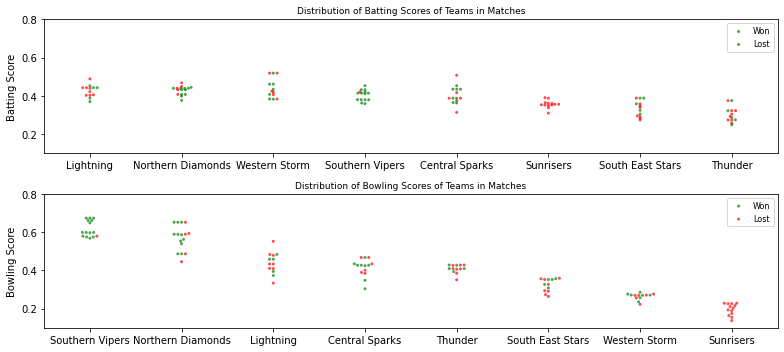

In [93]:
#
fig, ax =plt.subplots(2,1,figsize=(11,5))

ax[0].set_title('Distribution of Batting Scores of Teams in Matches',fontsize=9)
sns.swarmplot(y=mi_df['batter_score_scaled'],x=mi_df['team'],size=3,alpha=0.7,
              hue=mi_df['Won Match'],palette={"No":"Red","Yes":"Green"},order=order1,ax=ax[0])

ax[0].set(xlabel="",ylabel="Batting Score")
ax[0].legend(["Won","Lost"],fontsize=8)
ax[0].set_ylim([0.1,0.8])


ax[1].set_title('Distribution of Bowling Scores of Teams in Matches',fontsize=9)
sns.swarmplot(y=mi_df['bowler_score_scaled'],x=mi_df['team'],size=3,alpha=0.7,
              hue=mi_df['Won Match'],palette={"No":"Red","Yes":"Green"},order=order2,ax=ax[1])

ax[1].set(xlabel="",ylabel="Bowling Score")
ax[1].legend(["Won","Lost"],fontsize=8)
ax[1].set_ylim([0.1,0.8])


plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/DistTeamBattingBowlingScores.jpeg',bbox_inches='tight')
plt.show()

The Team Batting Scores in most of the matches ranged from 0.25 to 0.55 and had less variability among the teams. The bowling scores ranged from 0.1 to 0.7. The Southern Vipers had the most high-valued Team Bowling Scores while the Sunrisers had the set of lowest values. 

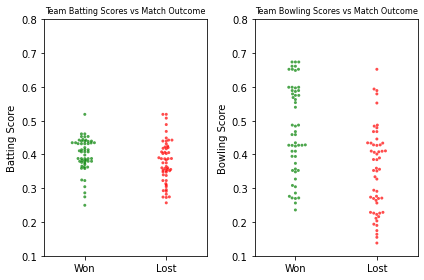

In [94]:
fig, ax =plt.subplots(1,2)

ax[0].set_title('Team Batting Scores vs Match Outcome',fontsize=8)
sns.swarmplot(y=mi_df['batter_score_scaled'],x=mi_df['Won Match'],size=3,alpha=0.7,
              hue=mi_df['Won Match'],palette={"No":"Red","Yes":"Green"},ax=ax[0])
ax[0].set(xlabel="",ylabel="Batting Score")
ax[0].set_xticklabels(["Won","Lost"])
ax[0].legend().set_visible(False)
ax[0].set_ylim([0.1,0.8])

ax[1].set_title('Team Bowling Scores vs Match Outcome',fontsize=8)
sns.swarmplot(y=mi_df['bowler_score_scaled'],x=mi_df['Won Match'],size=3,alpha=0.7,
              hue=mi_df['Won Match'],palette={"No":"Red","Yes":"Green"},ax=ax[1])
ax[1].set(xlabel="",ylabel="Bowling Score")
ax[1].set_xticklabels(["Won","Lost"])
ax[1].legend().set_visible(False)
ax[1].set_ylim([0.1,0.8])

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/DistScoresMatchOutcomes.jpeg',bbox_inches='tight')
plt.show()

Generally, teams with bowling scores greater than 0.55 tended to win while those with bowling scores less than 0.25 tended to lose the match.

## Repeat the above data processing for 2022 match data

The datasets for 16 matches played for the 2022 season of the tournament were prepared. The previous steps of assigning scores were also done for these data in order to prepare the validation data set that would eventually be used to compare the predictions of modelling later.

In [131]:
player_scores.head()

,player,batter_score_scaled,bowler_score_scaled
0,AE Jones,0.676597,NaN
1,Anisha Patel,0.115795,0.292210
2,CAE Hill,0.252109,NaN
3,CK Boycott,0.232431,0.432563
4,D Perrin,0.263653,0.000000


In [132]:
player_scores[(player_scores['player']=='RA Fackrell (CF)') | (player_scores['player']=='RA Fackrell (L)')]

,player,batter_score_scaled,bowler_score_scaled
15,RA Fackrell (CF),0.216500,0.662837
33,RA Fackrell (L),0.097312,NaN


In [133]:
match_player_roster2022=pd.read_csv("C:\\Users\\DELL\\Cricdata\\match_player_roster2022.csv")
match_player_roster2022.head()

,match_id,team,player,role
0,202201,Central Sparks,E Jones,batter
1,202201,Central Sparks,S Glenn,bowler
2,202201,Central Sparks,TF Brookes,allrounder
3,202201,Central Sparks,GK Davis,bowler
4,202201,Central Sparks,EA Russell,bowler


In [134]:
match_player_roster2022[match_player_roster2022['player']=='RA Fackrell']

,match_id,team,player,role


In [ ]:
match_player_roster2022['player'][match_player_roster2022['player']=='RA Fackrell']='RA Fackrell (CF)'

In [136]:
match_player_roster2022 = pd.merge(match_player_roster2022, player_scores, on='player', how='left')
match_player_roster2022.head()

,match_id,team,player,role,batter_score_scaled,bowler_score_scaled
0,202201,Central Sparks,E Jones,batter,0.832781,0.586093
1,202201,Central Sparks,S Glenn,bowler,0.321250,0.405512
2,202201,Central Sparks,TF Brookes,allrounder,0.273663,0.227188
3,202201,Central Sparks,GK Davis,bowler,0.195423,0.491267
4,202201,Central Sparks,EA Russell,bowler,0.167500,0.342921


In [137]:
match_player_roster2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             352 non-null    int64  
 1   team                 352 non-null    object 
 2   player               352 non-null    object 
 3   role                 352 non-null    object 
 4   batter_score_scaled  314 non-null    float64
 5   bowler_score_scaled  224 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.2+ KB


In [138]:
#match_player_roster2022.to_csv("C:\\Users\\DELL\\Cricdata\\match_player_roster2022.csv",index=False)

In [139]:
match_player_roster2022.columns

Index(['match_id', 'team', 'player', 'role', 'batter_score_scaled',
       'bowler_score_scaled'],
      dtype='object')

In [140]:
team_batting_score2022 = match_player_roster2022[['match_id', 'team', 'player',
                                          'role', 'batter_score_scaled']][(match_player_roster2022['role']=='batter')|
                                                                   (match_player_roster2022['role']=='allrounder')]

team_batting_score2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 350
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             239 non-null    int64  
 1   team                 239 non-null    object 
 2   player               239 non-null    object 
 3   role                 239 non-null    object 
 4   batter_score_scaled  227 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [141]:
team_batting_score2022[team_batting_score2022['batter_score_scaled'].isnull()]

,match_id,team,player,role,batter_score_scaled
21,202201,Southern Vipers,F Kemp,allrounder,NaN
87,202204,Thunder,D Dottin,allrounder,NaN
119,202206,Northern Diamonds,P Turner,batter,NaN
128,202206,Sunrisers,J Olorenshaw,batter,NaN
141,202207,Thunder,D Dottin,allrounder,NaN
164,202208,Southern Vipers,F Kemp,allrounder,NaN
195,202209,Northern Diamonds,P Turner,batter,NaN
217,202210,Thunder,D Dottin,allrounder,NaN
227,202211,Sunrisers,J Olorenshaw,batter,NaN
282,202213,Sunrisers,J Olorenshaw,batter,NaN


In [142]:
#assign default average scores to new players of 2022
team_batting_score2022['batter_score_scaled'].fillna(team_batting_score2022['batter_score_scaled'].mean() , inplace=True)

In [143]:
team_batting_score2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 350
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             239 non-null    int64  
 1   team                 239 non-null    object 
 2   player               239 non-null    object 
 3   role                 239 non-null    object 
 4   batter_score_scaled  239 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [144]:
team_batting_score2022 = team_batting_score2022.groupby(['match_id','team']).agg({'batter_score_scaled':'mean'}).reset_index()

In [145]:
team_batting_score2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             32 non-null     int64  
 1   team                 32 non-null     object 
 2   batter_score_scaled  32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


In [146]:
team_batting_score2022.head()

,match_id,team,batter_score_scaled
0,202201,Central Sparks,0.407209
1,202201,Southern Vipers,0.446843
2,202202,South East Stars,0.340529
3,202202,Sunrisers,0.301456
4,202203,Lightning,0.454191


In [147]:
team_bowling_score2022 = match_player_roster2022[['match_id', 'team', 'player',
                                          'role', 'bowler_score_scaled']][(match_player_roster2022['role']=='bowler')|
                                                                   (match_player_roster2022['role']=='allrounder')]

team_bowling_score2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 1 to 351
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             232 non-null    int64  
 1   team                 232 non-null    object 
 2   player               232 non-null    object 
 3   role                 232 non-null    object 
 4   bowler_score_scaled  192 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.9+ KB


In [148]:
team_bowling_score2022[team_bowling_score2022['bowler_score_scaled'].isnull()]

,match_id,team,player,role,bowler_score_scaled
10,202201,Central Sparks,G Potts,bowler,NaN
21,202201,Southern Vipers,F Kemp,allrounder,NaN
32,202202,South East Stars,A Stonehouse,bowler,NaN
41,202202,Sunrisers,K Speed,allrounder,NaN
43,202202,Sunrisers,A Maqsood,bowler,NaN
54,202203,Western Storm,Sophia Smale,bowler,NaN
76,202204,Northern Diamonds,L Kasperek,bowler,NaN
86,202204,Thunder,D Mullan,allrounder,NaN
87,202204,Thunder,D Dottin,allrounder,NaN
97,202205,Central Sparks,G Potts,bowler,NaN


In [149]:
#find count of 2022 players having no bowler scores
team_bowling_score2022[team_bowling_score2022['bowler_score_scaled'].isnull()]['player'].value_counts()

G Potts         4
A Stonehouse    4
A Maqsood       4
Sophia Smale    4
L Kasperek      4
D Mullan        4
D Dottin        4
E Marlow        3
F Kemp          2
K Speed         2
GM Davies       2
L Smith         2
B Miles         1
Name: player, dtype: int64

In [150]:
#check the previous seasons' players who have no bowler scores to find out the ones that are only new to 2022 season
team_bowling_score = match_player_roster[['match_id', 'team', 'player',
                                          'role', 'bowler_score_scaled']][(match_player_roster['role']=='bowler')|
                                                                   (match_player_roster['role']=='allrounder')]

team_bowling_score[team_bowling_score['bowler_score_scaled'].isnull()]['player'].value_counts()

GM Davies          14
ML Kirk             4
GH Lewis            4
S Turner            2
K Speed             2
D Mullan            2
RA Fackrell (L)     1
Ilenia Sims         1
Name: player, dtype: int64

In [151]:
#remove the players that were already from previous seasons
team_bowling_score2022.drop(team_bowling_score2022.index[(team_bowling_score2022['player'] == 'GM Davies')|
                                                         (team_bowling_score2022['player'] == 'K Speed')|
                                                         (team_bowling_score2022['player'] == 'D Mullan')], inplace = True)

In [152]:
team_bowling_score2022[team_bowling_score2022['bowler_score_scaled'].isnull()]['player'].value_counts()

G Potts         4
A Stonehouse    4
A Maqsood       4
Sophia Smale    4
L Kasperek      4
D Dottin        4
E Marlow        3
F Kemp          2
L Smith         2
B Miles         1
Name: player, dtype: int64

In [153]:
#assign default average scores to new players of 2022
team_bowling_score2022['bowler_score_scaled'].fillna(team_bowling_score2022['bowler_score_scaled'].mean(), inplace=True)

In [154]:
team_bowling_score2022.reset_index(drop=True, inplace=True)

In [155]:
team_bowling_score2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             224 non-null    int64  
 1   team                 224 non-null    object 
 2   player               224 non-null    object 
 3   role                 224 non-null    object 
 4   bowler_score_scaled  224 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.9+ KB


In [156]:
team_bowling_score2022 = team_bowling_score2022.groupby(['match_id','team']).agg({'bowler_score_scaled':'mean'}).reset_index()

In [157]:
team_bowling_score2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             32 non-null     int64  
 1   team                 32 non-null     object 
 2   bowler_score_scaled  32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


In [158]:
team_bowling_score2022.head()

,match_id,team,bowler_score_scaled
0,202201,Central Sparks,0.398775
1,202201,Southern Vipers,0.571312
2,202202,South East Stars,0.319896
3,202202,Sunrisers,0.204793
4,202203,Lightning,0.389523


In [159]:
team_scores2022 = pd.merge(team_batting_score2022, team_bowling_score2022, on=['match_id','team'], how='outer')

In [160]:
team_scores2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             32 non-null     int64  
 1   team                 32 non-null     object 
 2   batter_score_scaled  32 non-null     float64
 3   bowler_score_scaled  32 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [161]:
team_scores2022.head()

,match_id,team,batter_score_scaled,bowler_score_scaled
0,202201,Central Sparks,0.407209,0.398775
1,202201,Southern Vipers,0.446843,0.571312
2,202202,South East Stars,0.340529,0.319896
3,202202,Sunrisers,0.301456,0.204793
4,202203,Lightning,0.454191,0.389523


In [162]:
match_info2022 = pd.read_csv('C:\\Users\\DELL\\Cricdata\\match_summary2022.csv')
match_info2022.head()

,match_id,Team1,Team2,Season,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,202201,Central Sparks,Southern Vipers,2022,Southern Vipers,field,Southern Vipers,7,Y,N
1,202202,South East Stars,Sunrisers,2022,South East Stars,bat,South East Stars,80,N,Y
2,202203,Western Storm,Lightning,2022,Lightning,field,Western Storm,75,N,Y
3,202204,Northern Diamonds,Thunder,2022,Thunder,bat,Northern Diamonds,6,Y,N
4,202205,Central Sparks,Western Storm,2022,Central Sparks,bat,Central Sparks,22,N,Y


In [163]:
team1_df2022 = pd.merge(match_info2022[['match_id','Team1']], team_scores2022, 
                        left_on=['match_id','Team1'], right_on=['match_id','team'], how='left')

team1_df2022.drop('team',axis=1,inplace=True)
team1_df2022.rename(columns={"batter_score_scaled":"Team1_batting_score",
                             "bowler_score_scaled":"Team1_bowling_score"},inplace=True)

In [164]:
team1_df2022.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score
0,202201,Central Sparks,0.407209,0.398775
1,202202,South East Stars,0.340529,0.319896
2,202203,Western Storm,0.447008,0.280188
3,202204,Northern Diamonds,0.411408,0.566963
4,202205,Central Sparks,0.407209,0.398775


In [165]:
team2_df2022 = pd.merge(match_info2022[['match_id','Team2']], team_scores2022, 
                        left_on=['match_id','Team2'], right_on=['match_id','team'], how='left')

team2_df2022.drop('team',axis=1,inplace=True)
team2_df2022.rename(columns={"batter_score_scaled":"Team2_batting_score",
                             "bowler_score_scaled":"Team2_bowling_score"},inplace=True)

In [166]:
team2_df2022.head()

,match_id,Team2,Team2_batting_score,Team2_bowling_score
0,202201,Southern Vipers,0.446843,0.571312
1,202202,Sunrisers,0.301456,0.204793
2,202203,Lightning,0.454191,0.389523
3,202204,Thunder,0.268601,0.480559
4,202205,Western Storm,0.404985,0.226753


In [167]:
matches_info_final2022 = pd.merge(team1_df2022, team2_df2022, on='match_id', how='left')

In [168]:
matches_info_final2022.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score
0,202201,Central Sparks,0.407209,0.398775,Southern Vipers,0.446843,0.571312
1,202202,South East Stars,0.340529,0.319896,Sunrisers,0.301456,0.204793
2,202203,Western Storm,0.447008,0.280188,Lightning,0.454191,0.389523
3,202204,Northern Diamonds,0.411408,0.566963,Thunder,0.268601,0.480559
4,202205,Central Sparks,0.407209,0.398775,Western Storm,0.404985,0.226753


In [169]:
matches_info_final2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             16 non-null     int64  
 1   Team1                16 non-null     object 
 2   Team1_batting_score  16 non-null     float64
 3   Team1_bowling_score  16 non-null     float64
 4   Team2                16 non-null     object 
 5   Team2_batting_score  16 non-null     float64
 6   Team2_bowling_score  16 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ KB


In [170]:
#matches_info_final2022.to_csv("C:\\Users\\DELL\\Cricdata\\matches_info_final2022.csv",index=False)

In [171]:
winners_df2022 = match_info2022[['match_id','Winner']]

In [172]:
winners_df2022.head()

,match_id,Winner
0,202201,Southern Vipers
1,202202,South East Stars
2,202203,Western Storm
3,202204,Northern Diamonds
4,202205,Central Sparks


In [173]:
#winners_df2022.to_csv("C:\\Users\\DELL\\Cricdata\\winners_df2022.csv",index=False)